In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf
from datetime import date, timedelta
from scipy import stats


sns.set_style("darkgrid")

In [12]:
# Data
num_data = 10000
end_date = date.today()
start_date = end_date - timedelta(hours=num_data)
interval = "1h"

# Oil Futures.
df = yf.download("CL=F", start=start_date.strftime("%Y-%m-%d"), end=end_date.strftime("%Y-%m-%d"), interval=interval)

# Assess the closing price
df.rename(columns={"Adj Close": "price"}, inplace=True)
df = df[["price"]]

df["returns"] = df["price"].pct_change()
df["log_returns"] = np.log(df["price"]/df["price"].shift(1))

df.dropna(inplace=True)
df.tail()

[*********************100%***********************]  1 of 1 completed


/var/folders/2v/xw5v0n3d5rlf442fyyzb04dc0000gn/T/ipykernel_3841/2746388659.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["returns"] = df["price"].pct_change()
/var/folders/2v/xw5v0n3d5rlf442fyyzb04dc0000gn/T/ipykernel_3841/2746388659.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["log_returns"] = np.log(df["price"]/df["price"].shift(1))
/var/folders/2v/xw5v0n3d5rlf442fyyzb04dc0000gn/T/ipykernel_3841/2746388659.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

,price,returns,log_returns
2023-01-26 13:00:00-05:00,80.889999,-0.007363,-0.007390
2023-01-26 14:00:00-05:00,81.230003,0.004203,0.004194
2023-01-26 15:00:00-05:00,81.099998,-0.001600,-0.001602
2023-01-26 16:00:00-05:00,81.099998,0.000000,0.000000
2023-01-26 18:00:00-05:00,81.139999,0.000493,0.000493


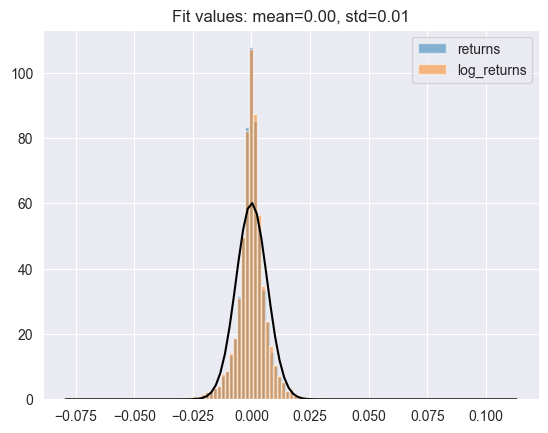

In [15]:
# Histograms of data.
num_bins = 100
alpha = 0.5
plt.hist(df["returns"], bins=num_bins, density=True, alpha=alpha, label="returns")
plt.hist(df["log_returns"], bins=num_bins, density=True, alpha=alpha, label="log_returns")

# Normal Distribution PDF(x).
mean, std = stats.norm.fit(df["returns"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, num_bins)
pdf = stats.norm.pdf(x, mean, std)

plt.plot(x, pdf, color="k")
plt.title(f"Fit values: mean={mean:.2f}, std={std:.2f}")
plt.legend()
plt.show()

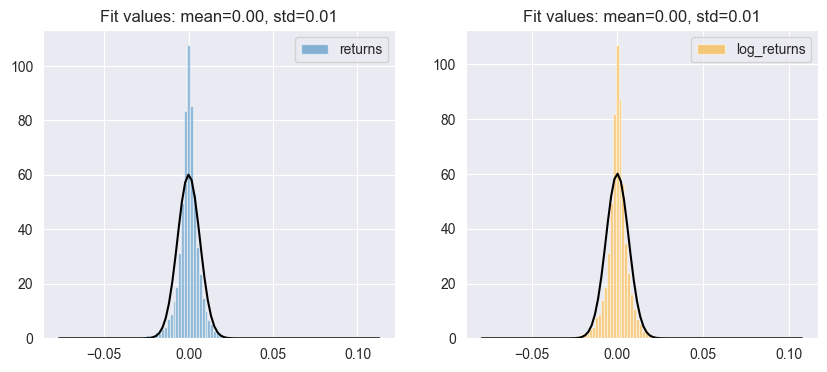

In [27]:
# Histograms of data.
num_bins = 100
alpha = 0.5

fig = plt.figure()
fig.set_size_inches(10, 4)

# Simple Returns.
plt.subplot(1, 2, 1)
plt.hist(df["returns"], bins=num_bins, density=True, alpha=alpha, label="returns")

# Normal Distribution PDF(x).
mean, std = stats.norm.fit(df["returns"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, num_bins)
pdf = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf, color="k")
plt.title(f"Fit values: mean={mean:.2f}, std={std:.2f}")
plt.legend()


# Log Returns.
plt.subplot(1, 2, 2)
plt.hist(df["log_returns"], bins=num_bins, density=True, alpha=alpha, color="orange", label="log_returns")

# Normal Distribution PDF(log(x)).
mean, std = stats.norm.fit(df["log_returns"])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, num_bins)
pdf = stats.norm.pdf(x, mean, std)
plt.plot(x, pdf, color="k")
plt.title(f"Fit values: mean={mean:.2f}, std={std:.2f}")
plt.legend()
plt.show()

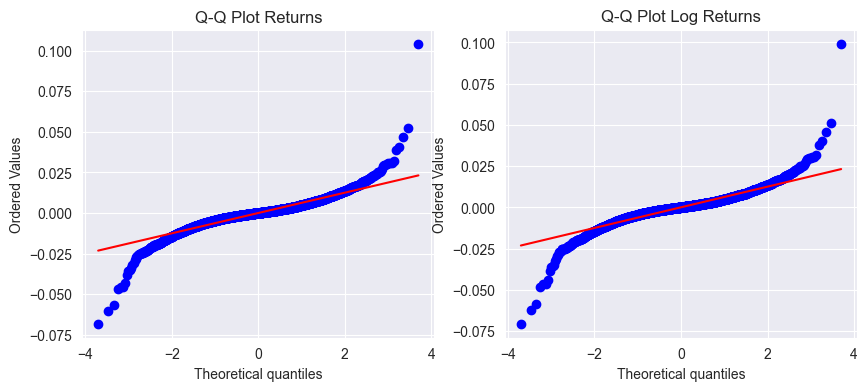

In [33]:
fig = plt.figure()
fig.set_size_inches(10, 4)

# Simple Returns.
plt.subplot(1, 2, 1)
stats.probplot(df["returns"], dist="norm", plot=plt)
plt.title("Q-Q Plot Returns")

# Log Returns.
plt.subplot(1, 2, 2)
stats.probplot(df["log_returns"], dist="norm", plot=plt)
plt.title("Q-Q Plot Log Returns")

plt.show()

# Assessment of normality.
Likelihood of tail values is essentially 0:

In [20]:
# Look at best and worst cases to assess fat tails
log_return_min = min(log_returns)
log_return_max = max(log_returns)


def standardise(x: np.ndarray, data) -> np.ndarray:
    return (x - data.mean()) / data.std()

# Standardise for inspection
log_return_min_standardised = standardise(log_return_min, log_returns)
log_return_max_standardised = standardise(log_return_max, log_returns)

log_return_min_standardised, log_return_max_standardised

(-10.633973403686639, 14.939821267783664)

In [21]:
stats.norm(0,1).pdf(log_return_min_standardised), stats.norm(0,1).pdf(log_return_max_standardised)

(1.1107035201450105e-25, 1.3615193793359135e-49)